In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# !unzip -uq "/content/drive/My Drive/gestures.zip" -d "/content/"

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split

# Uploading Images

The dataset contains images for {palm, l , fist, fist_moved, thumb, index, ok, palm_moved, c, down} representing {0,1,2,3,4,5,6,7,8,9} 

In [24]:

imgpath=[]
X=[]
Y=[]
labels=[]
for dirname, _, filenames in os.walk('/content/gestures'):
  for filename in filenames:
    path=os.path.join(dirname,filename)
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=cv2.resize(gray,(120,120))
    X.append(gray)
    category=path.split('/')[5]
    Y.append(int(category.partition('_')[0][1]))
    labels.append(category.partition('_')[2])
    

In [25]:
label_classes=np.unique(labels)
sorted(label_classes)

['c',
 'down',
 'fist',
 'fist_moved',
 'index',
 'l',
 'ok',
 'palm',
 'palm_moved',
 'thumb']

In [26]:
x_temp=X.copy()
y_temp=Y.copy()

# Shuffle Data 

In [27]:
shuffled_indices=np.arange(len(X))
np.random.shuffle(shuffled_indices)

In [28]:
shuffled_indices

array([ 8025,  2958,  1672, ...,  1741, 13213, 10222])

In [29]:
X_final=np.array(X)[shuffled_indices]
Y_final=np.array(Y)[shuffled_indices]

In [30]:
classes=["down", "palm" , "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]

In [31]:
labels=np.array(labels)[shuffled_indices]

In [32]:
np.unique(labels)

array(['c', 'down', 'fist', 'fist_moved', 'index', 'l', 'ok', 'palm',
       'palm_moved', 'thumb'], dtype='<U10')

# Display Data

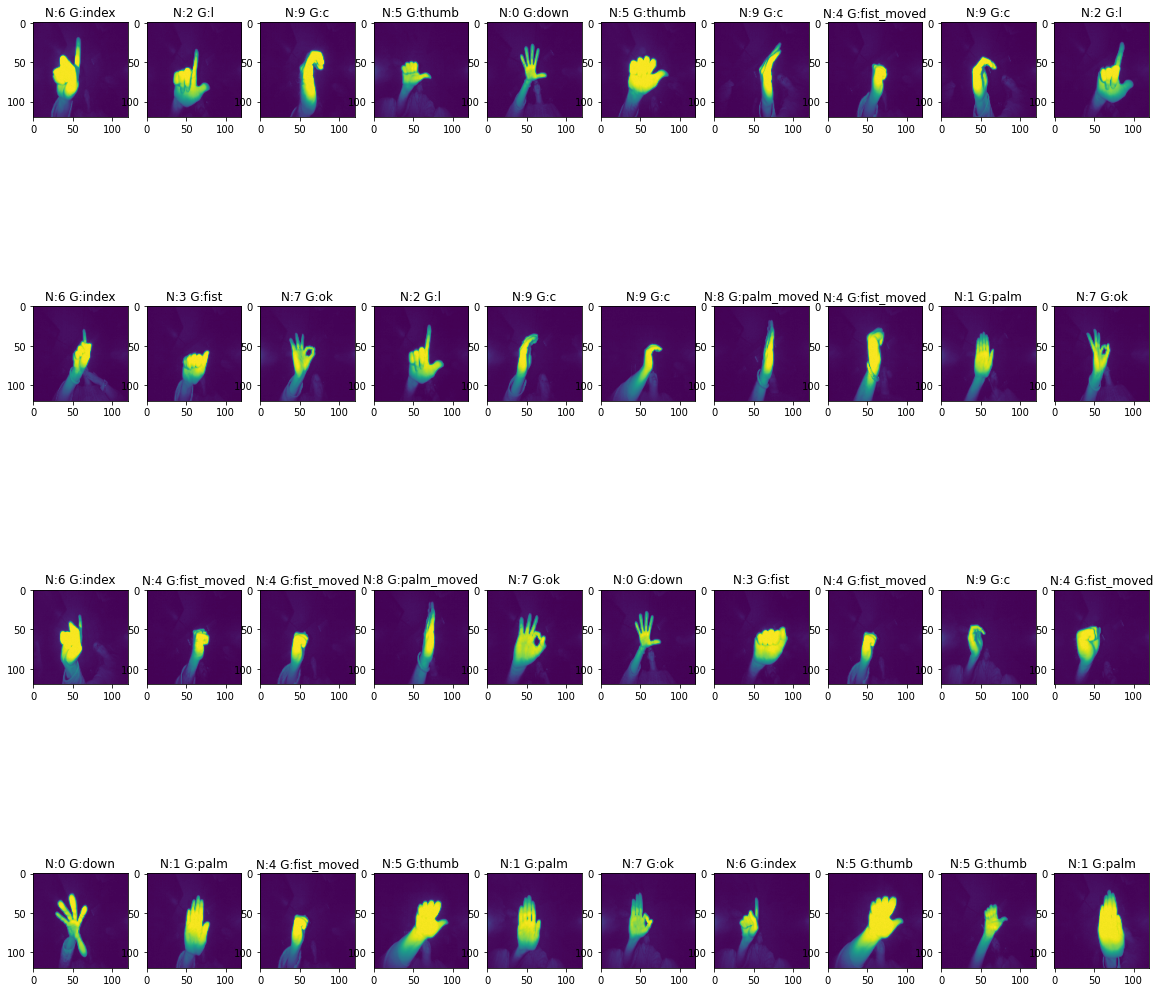

In [33]:
n_rows=4
n_cols=10
plt.figure(figsize=(20,20))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_final[index])
    plt.title('N:{} G:{}'.format(Y_final[index],labels[index]))
plt.show()

In [34]:
X_final=X_final.reshape(20000,120,120,1)

# Split Data
Train and test

In [35]:
X_train,X_test=X_final[4000:] /255.,X_final[:4000] /255.

In [36]:
X_label=labels[:4000]

In [37]:
Y_train,Y_test=Y_final[4000:],Y_final[:4000]

In [38]:
X_test.shape

(4000, 120, 120, 1)

# Model Creation

In [39]:
  model2=tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(120,120,1)),
                             tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10,activation='softmax')
  ])
  optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3)
  model2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# Training 

In [40]:
model2.fit(X_train,Y_train,epochs=10,
              validation_data=(X_test,Y_test))

Epoch 1/10
500/500 [==============================] - 49s 32ms/step - loss: 1.8986 - accuracy: 0.3319 - val_loss: 0.5023 - val_accuracy: 0.8930
Epoch 2/10
500/500 [==============================] - 15s 31ms/step - loss: 0.5762 - accuracy: 0.8242 - val_loss: 0.1312 - val_accuracy: 0.9768
Epoch 3/10
500/500 [==============================] - 16s 31ms/step - loss: 0.2926 - accuracy: 0.9147 - val_loss: 0.0766 - val_accuracy: 0.9850
Epoch 4/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1967 - accuracy: 0.9409 - val_loss: 0.0438 - val_accuracy: 0.9915
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1530 - accuracy: 0.9539 - val_loss: 0.0311 - val_accuracy: 0.9930
Epoch 6/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1202 - accuracy: 0.9646 - val_loss: 0.0240 - val_accuracy: 0.9955
Epoch 7/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1145 - accuracy: 0.9663 - val_loss: 0.0210 - val_accuracy:

In [41]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 215296)            0         
_________________________________________________________________
dropout (Dropout)            (None, 215296)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               27558016  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [42]:
model2.evaluate(X_test,Y_test)

125/125 [==============================] - 1s 11ms/step - loss: 0.0116 - accuracy: 0.9977


[0.01158835832029581, 0.9977499842643738]

In [43]:
# round(model2.predict(X_test[:3]),2)

# Predictions on test data

In [44]:
predictions=model2.predict(X_test)

In [45]:
np.argmax(predictions[5]),Y_test[5],labels[5]

(5, 5, 'thumb')

In [46]:
X_test.shape

(4000, 120, 120, 1)

In [47]:
xcopy_test=X_test.copy()
xcopy_test=xcopy_test.reshape(4000,120,120)

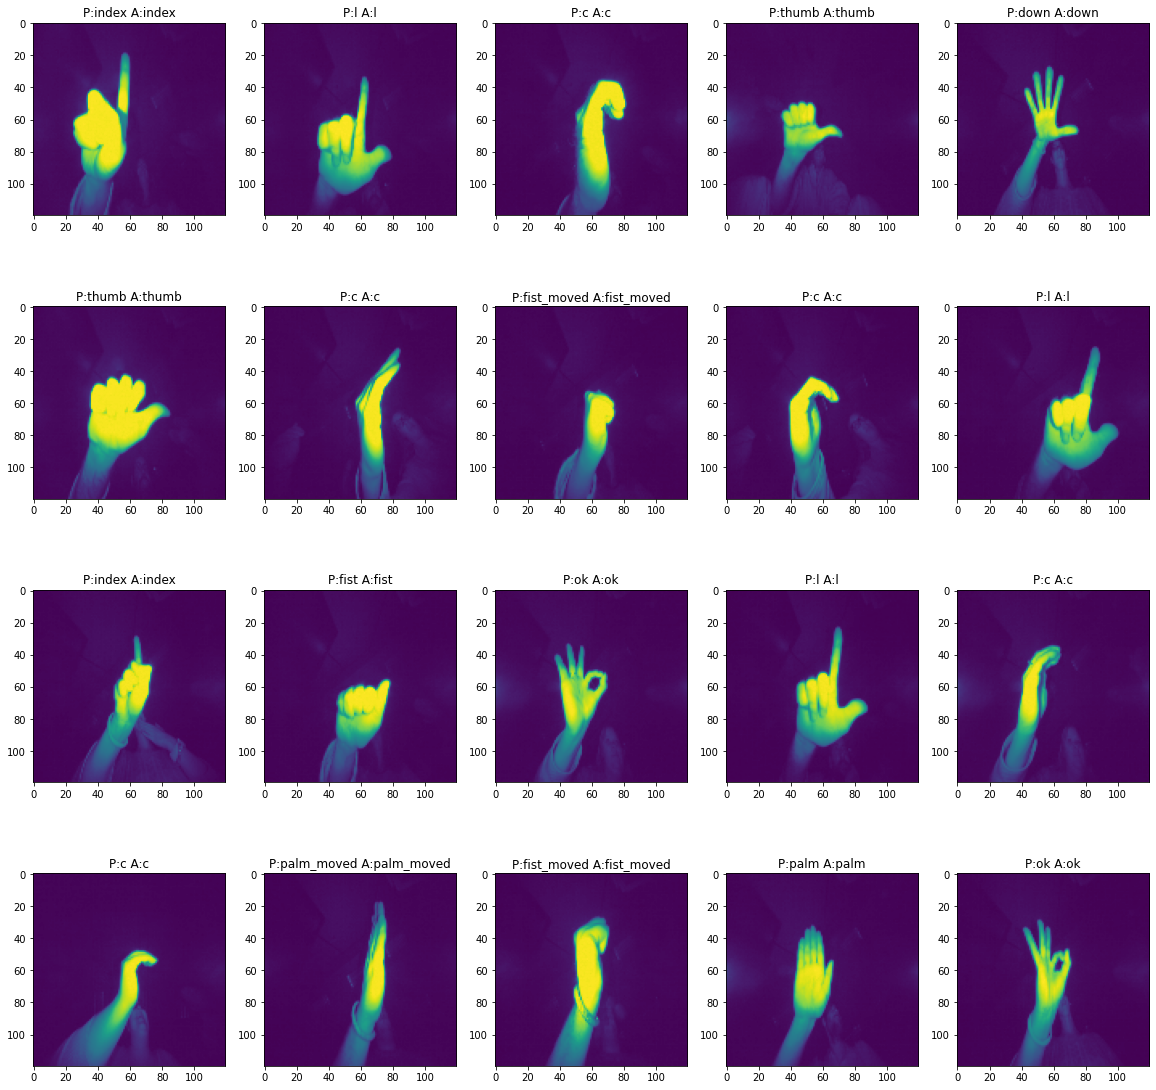

In [48]:
n_rows=4
n_cols=5
plt.figure(figsize=(20,20))
for row in range(n_rows):
  for col in range(n_cols):
    classes=["down", "palm" , "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)

    plt.imshow(xcopy_test[index])
    predict=predictions[index]
    pre_label=np.argmax(predict)
    
    plt.title('P:{} A:{}'.format(classes[pre_label],X_label[index]))
plt.show()

In [58]:
pred_t=model2.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


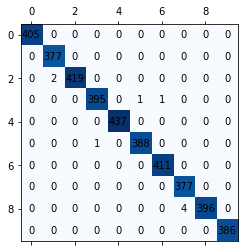

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,pred_t,labels=[0,1,2,3,4,5,6,7,8,9])
x=pd.DataFrame(cm)
# x=x.style.background_gradient(cmap=cm)
# display(x)
fig, ax = plt.subplots()
ax.matshow(x, cmap=plt.cm.Blues)

for i in range(10):
    for j in range(10):
        c = x[j][i]
        ax.text(i, j, str(c), va='center', ha='center')